<a href="https://colab.research.google.com/github/rightpeeps/AI_06_Section1_Project1/blob/main/AI_06_%EC%A0%95%EC%9A%B0%EB%AF%BC_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d = pd.read_csv('../content/vgames2.csv', index_col=0)
df = d.reset_index(drop=True)
names = np.array(df['Name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum() # 'Year', 'Genre', 'Publisher' NaN개수 확인

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
sales_df = df.filter(like='Sales')
year_df = df[['Year']]
rest_df = df[["Name","Platform",'Genre','Publisher']]

In [ ]:
errors_1 = sales_df['NA_Sales'][pd.to_numeric(sales_df['NA_Sales'], errors='coerce').isnull()]
errors_2 = sales_df['EU_Sales'][pd.to_numeric(sales_df['EU_Sales'], errors='coerce').isnull()]
errors_3 = sales_df['JP_Sales'][pd.to_numeric(sales_df['JP_Sales'], errors='coerce').isnull()]
errors_4 = sales_df['Other_Sales'][pd.to_numeric(sales_df['Other_Sales'], errors='coerce').isnull()]

In [ ]:
# 1 million = 1,000,000 / 40K = 40,000 = 0.04 Million / 0.4 Million = 400,000 = 400K / K = /1000 = /1e3
errors_NA = errors_1.replace({'K':'/1e3','M':''},regex=True).map(pd.eval).astype(float)
errors_EU = errors_2.replace({'K':'/1e3','M':''},regex=True).map(pd.eval).astype(float)
errors_JP = errors_3.replace({'K':'/1e3','M':''},regex=True).map(pd.eval).astype(float)
errors_other = errors_4.replace({'K':'/1e3','M':''},regex=True).map(pd.eval).astype(float)

In [ ]:
errors_all = pd.concat([errors_NA, errors_EU, errors_JP, errors_other], axis=1)
clean_sales_df = errors_all.combine_first(sales_df).astype(float) # clean_sales_df float으로 변경완료
clean_sales_df['Total_Sales'] = clean_sales_df.sum(axis=1)
clean_sales_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,0.04,0.00,0.00,0.00,0.04
1,0.17,0.00,0.00,0.01,0.18
2,0.00,0.00,0.02,0.00,0.02
3,0.04,0.00,0.00,0.00,0.04
4,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...
16593,0.15,0.04,0.00,0.01,0.20
16594,0.01,0.00,0.00,0.00,0.01
16595,0.44,0.19,0.03,0.13,0.79
16596,0.05,0.05,0.25,0.03,0.38


In [ ]:
errors_year = year_df[ year_df < 1980 ]
errors_year[errors_year >= 80] = errors_year[errors_year >= 80] + 1900
errors_year[errors_year <= 19] = errors_year[errors_year <= 19] + 2000

clean_year_df = errors_year.combine_first(year_df).astype(float) # clean_sales_df float으로 combine 변경완료 / 0 > 2000 변경완료 
clean_year_df = clean_year_df[ clean_year_df < 2020] # 2020이 한개라서 제외함
clean_year_df.describe()

,Year
count,16326.000000
mean,2006.405611
std,5.828189
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2017.000000


In [ ]:
new_df = pd.concat([rest_df, clean_year_df, clean_sales_df], axis=1)

#NaN Value가 있는 행들 확인
is_NaN = new_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = new_df[row_has_NaN]

In [ ]:
over3mil = rows_with_NaN[rows_with_NaN[sales_df.columns].sum(axis=1) > 3]
update_games = np.array(over3mil)
update_games[0,2] = 'Role-Playing'
update_games[1,4] = 2008.0
update_games[2,2] = 'Misc'
update_games[3,4] = 2004.0 
update_games[4,2] = 'Role-Playing'
update_games[5,4] = 2004.0 
#errors_year[errors_year <= 19] = errors_year[errors_year <= 19] + 2000
#filter(starwars, hair_color == "none" & eye_color == "black")

In [ ]:
update_games_df = pd.DataFrame(update_games, index = over3mil.index, columns = over3mil.columns)
new_df2 = update_games_df.combine_first(new_df)
new_df2 = new_df2.dropna(axis='rows')
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16246 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16246 non-null  object
 1   Platform     16246 non-null  object
 2   Genre        16246 non-null  object
 3   Publisher    16246 non-null  object
 4   Year         16246 non-null  object
 5   NA_Sales     16246 non-null  object
 6   EU_Sales     16246 non-null  object
 7   JP_Sales     16246 non-null  object
 8   Other_Sales  16246 non-null  object
 9   Total_Sales  16246 non-null  object
dtypes: object(10)
memory usage: 1.4+ MB


In [ ]:
new_df2[['Year','NA_Sales','EU_Sales', 'JP_Sales','Other_Sales','Total_Sales']] = new_df2[['Year','NA_Sales','EU_Sales', 'JP_Sales','Other_Sales','Total_Sales']].apply(pd.to_numeric)
new_df2.reset_index(drop=True)

,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,Action,Destineer,2008.0,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,Action,Namco Bandai Games,2009.0,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,2010.0,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,2010.0,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,2010.0,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16241,Ice Age 2: The Meltdown,GC,Platform,Vivendi Games,2006.0,0.15,0.04,0.00,0.01,0.20
16242,Rainbow Islands: Revolution,PSP,Action,Rising Star Games,2005.0,0.01,0.00,0.00,0.00,0.01
16243,NBA 2K16,PS3,Sports,Take-Two Interactive,2015.0,0.44,0.19,0.03,0.13,0.79
16244,Toukiden: The Age of Demons,PSV,Action,Tecmo Koei,2013.0,0.05,0.05,0.25,0.03,0.38


In [ ]:
genre_sales = new_df2[['Genre','NA_Sales','EU_Sales','JP_Sales']] #필요한 열만 추려서 데이터프레임 만듬
genre_sales_df = genre_sales.set_index('Genre')
genre_sales_df

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,0.04,0.00,0.00
Action,0.17,0.00,0.00
Adventure,0.00,0.00,0.02
Misc,0.04,0.00,0.00
Platform,0.12,0.09,0.00
...,...,...,...
Platform,0.15,0.04,0.00
Action,0.01,0.00,0.00
Sports,0.44,0.19,0.03


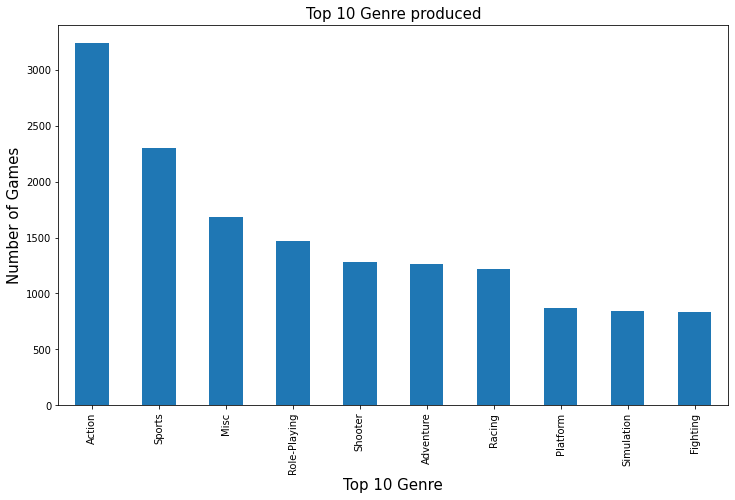

In [ ]:
import matplotlib.pyplot as plt

top_genre_made = genre_sales['Genre'].value_counts(sort=True) 
top_genre_made[:10].plot(x='Genre', y=['NA_Sales', 'EU_Sales', 'JP_Sales'], kind='bar', figsize=(12,7))
plt.title('Top 10 Genre produced',fontsize=15)
plt.xlabel('Top 10 Genre',fontsize=15)
plt.ylabel('Number of Games',fontsize=15)
plt.show()

In [ ]:
top_genre=genre_sales['Genre'].value_counts(sort=True) 
top_genre

Action          3241
Sports          2301
Misc            1682
Role-Playing    1467
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       845
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

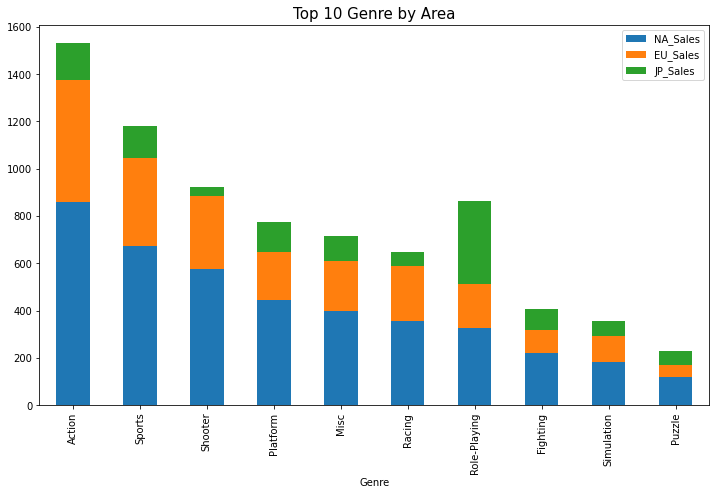

In [ ]:
import matplotlib.pyplot as plt
top_genre_area = genre_sales.groupby('Genre').sum()
top_genre_area.sort_values('NA_Sales', ascending=False).head(10).plot(kind='bar', figsize=(12,7), stacked = True)
plt.title('Top 10 Genre by Area',fontsize=15)
plt.show()

In [ ]:
top_genre_area_percent = top_genre_area.copy()
top_genre_area_percent['NA_Sales'] = (top_genre_area_percent['NA_Sales'] / top_genre_area_percent['NA_Sales'].sum()) * 100
top_genre_area_percent['EU_Sales'] = (top_genre_area_percent['EU_Sales'] / top_genre_area_percent['EU_Sales'].sum()) * 100
top_genre_area_percent['JP_Sales'] = (top_genre_area_percent['JP_Sales'] / top_genre_area_percent['JP_Sales'].sum()) * 100
top_genre_area_percent

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,19.910835,21.401453,12.228643
Adventure,2.354985,2.647217,4.050445
Fighting,5.097957,4.154209,6.804623
Misc,9.173777,8.802432,8.329689
Platform,10.304188,8.342932,10.192878
Puzzle,2.812841,2.098728,4.391691
Racing,8.206241,9.772995,4.397938
Role-Playing,7.537850,7.781968,27.299703
Shooter,13.291010,12.900503,2.981415


In [ ]:
from scipy.stats import chi2_contingency

chi2, pvalue, dof, expected = chi2_contingency(top_genre_area_percent) # correction 파라미터가 True로 설정 :  Yates’ correction 시행함 : pvalue는 약간 다름
chi2, pvalue, dof, expected
#p value로 봣을때 게임 장르의 종류와 지역별 출고량 값은 연관이없다 = 대립가설 : 연관이있다

(34.815652022130095,
 0.040497554177677975,
 22,
 array([[17.84697689, 17.84697689, 17.84697689],
        [ 3.017549  ,  3.017549  ,  3.017549  ],
        [ 5.35226279,  5.35226279,  5.35226279],
        [ 8.76863269,  8.76863269,  8.76863269],
        [ 9.61333302,  9.61333302,  9.61333302],
        [ 3.10108687,  3.10108687,  3.10108687],
        [ 7.4590581 ,  7.4590581 ,  7.4590581 ],
        [14.20650727, 14.20650727, 14.20650727],
        [ 9.72430936,  9.72430936,  9.72430936],
        [ 4.61718117,  4.61718117,  4.61718117],
        [13.87069732, 13.87069732, 13.87069732],
        [ 2.42240552,  2.42240552,  2.42240552]]))

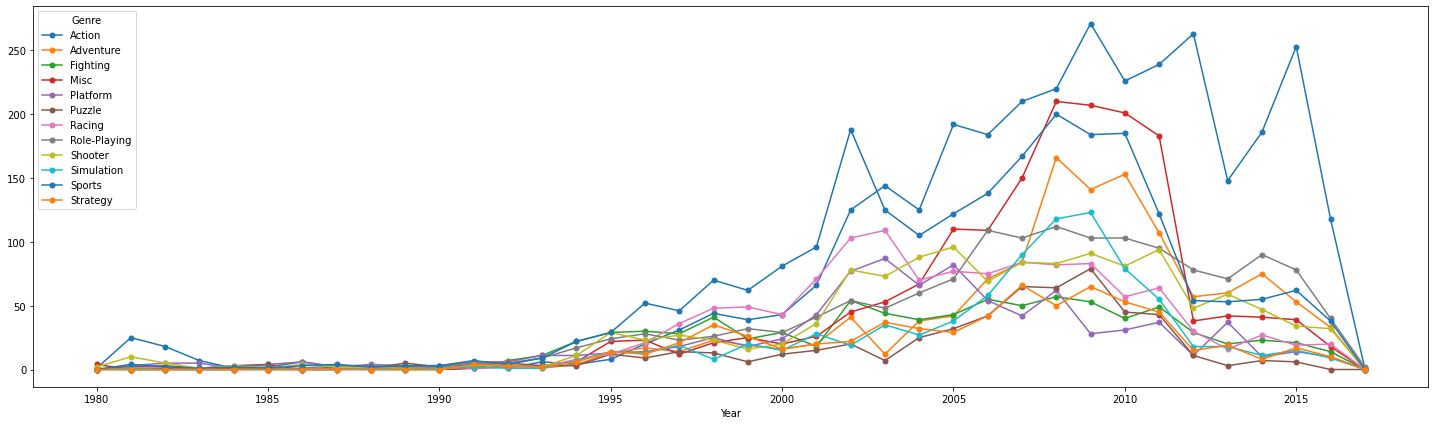

In [ ]:
year_genre_df = new_df2.groupby(['Year', 'Genre']).size().unstack(fill_value=0)
year_genre_df.plot(figsize=(25,7), marker='o', markersize=5)
plt.show()

In [ ]:
year_genre_dx = new_df2.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_genre = year_genre_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_genre_dx['Total_Sales']
year_genre_max = year_genre_dx[year_genre].reset_index(drop=True)

In [ ]:
genre_colors = year_genre_max['Genre'].copy()
genre_colors = genre_colors.replace({'Shooter': 'blue', 'Action': 'green', 'Puzzle':'purple','Platform':'orange','Fighting':'red', 'Racing':'grey', 'Role-Playing':'olive', 'Sports':'coral'})

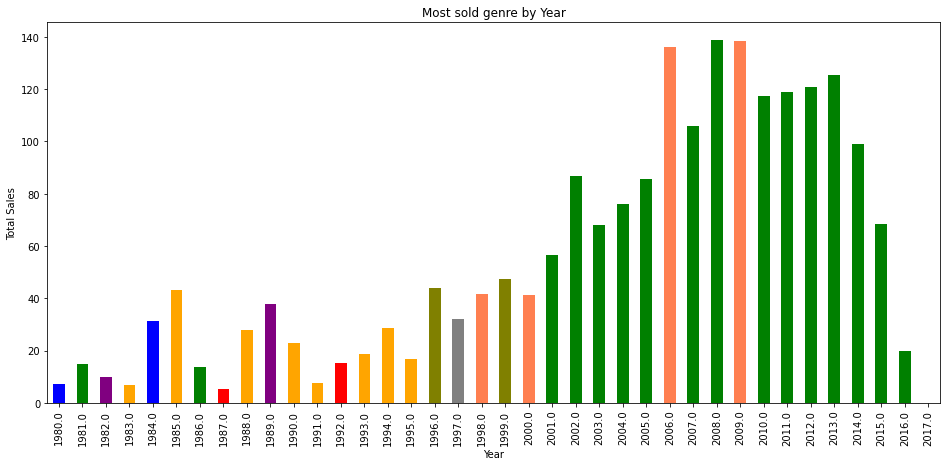

In [ ]:
year_genre_max.plot(kind='bar', x ='Year', y='Total_Sales', figsize=(16,7), color = genre_colors, legend=None)
plt.title('Most sold genre by Year')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.show()

In [ ]:
year_platform_dx = new_df2.groupby(by=['Year', 'Platform'])['Total_Sales'].sum().reset_index()
year_platform = year_platform_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_platform_dx['Total_Sales']
year_platform_max = year_platform_dx[year_platform].reset_index(drop=True)

In [ ]:
platform_colors = year_platform_max['Platform'].copy()
platform_colors = platform_colors.replace({'2600': 'blue', 'NES': 'green', 'GB':'purple', 'SNES':'grey','PS':'orange', 'PS2':'orange', 'Wii':'olive', 'X360':'coral', 'PS3':'orange', 'PS4':'orange'})

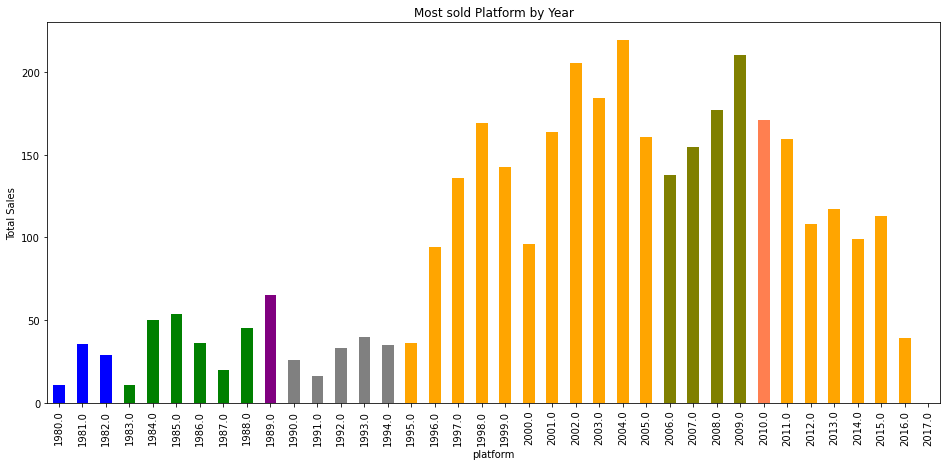

In [ ]:
year_platform_max.plot(kind='bar', x ='Year', y='Total_Sales', figsize=(16,7), color = platform_colors, legend=None)
plt.title('Most sold Platform by Year')
plt.ylabel('Total Sales')
plt.xlabel('platform')
plt.show()

In [ ]:
year_publisher_dx = new_df2.groupby(by=['Year', 'Publisher'])['Total_Sales'].sum().reset_index()
year_publisher = year_publisher_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_publisher_dx['Total_Sales']
year_publisher_max = year_publisher_dx[year_publisher].reset_index(drop=True)

In [ ]:
publisher_colors = year_publisher_max['Publisher'].copy()
publisher_colors = publisher_colors.replace({'Atari': 'blue', 'Activision': 'green', 'Nintendo':'purple', 'Sony Computer Entertainment':'orange', 'Electronic Arts':'red', 'Sega':'olive'})

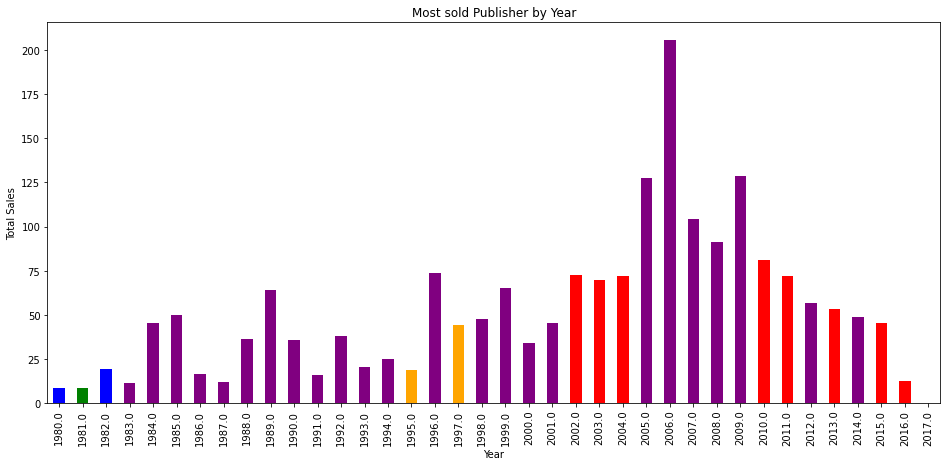

In [ ]:
year_publisher_max.plot(kind='bar', x ='Year', y='Total_Sales', figsize=(16,7), color = publisher_colors, legend=None)
plt.title('Most sold Publisher by Year')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.show()

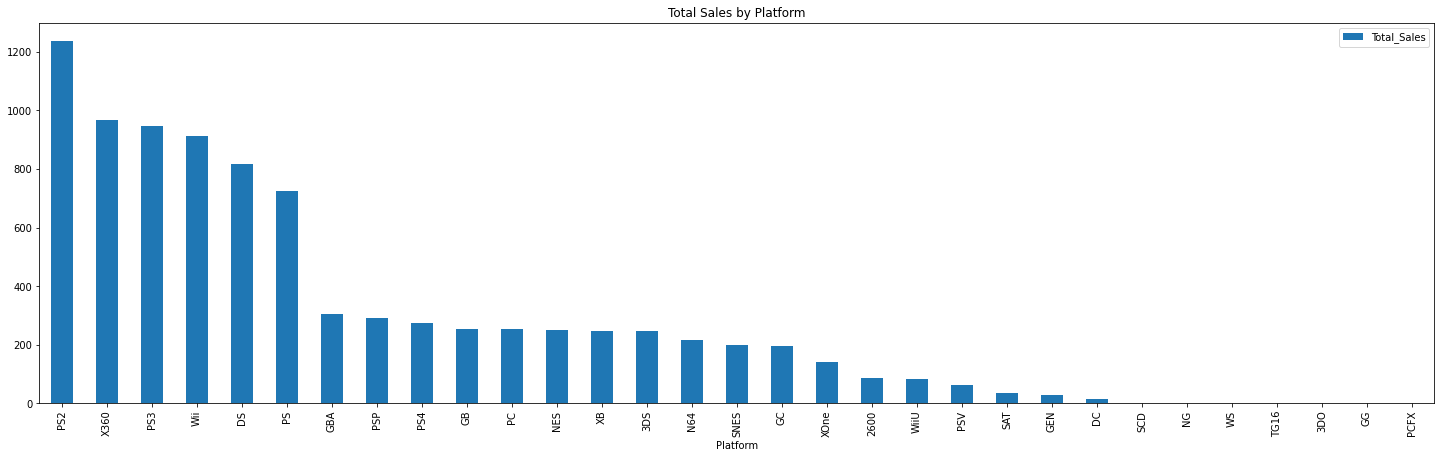

In [ ]:
byPlatform = new_df2.groupby('Platform').sum()
byPlatform = byPlatform.reset_index().sort_values(by='Total_Sales', ascending=False)[['Total_Sales','Platform']]
byPlatform.plot(figsize=(25,7), kind='bar', x ='Platform')
plt.title('Total Sales by Platform')
plt.show()

In [ ]:
top_PS = new_df2.loc[(new_df2['Genre'] == 'Action')& ( ( new_df2['Platform'] == 'PS3') | (new_df2['Platform'] == 'PS2') | (new_df2['Platform'] == 'PS4') | (new_df2['Platform'] == 'PS1') )].sort_values(by='Total_Sales' , ascending= False)
top_PS.head(10)

,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3483,Grand Theft Auto V,PS3,Action,Take-Two Interactive,2013.0,7.01,9.27,0.97,4.14,21.39
14669,Grand Theft Auto: San Andreas,PS2,Action,Take-Two Interactive,2004.0,9.43,0.40,0.41,10.57,20.81
5340,Grand Theft Auto: Vice City,PS2,Action,Take-Two Interactive,2002.0,8.41,5.49,0.47,1.78,16.15
9786,Grand Theft Auto III,PS2,Action,Take-Two Interactive,2001.0,6.99,4.51,0.30,1.30,13.10
2008,Grand Theft Auto V,PS4,Action,Take-Two Interactive,2014.0,3.80,5.81,0.36,2.02,11.99
16475,Grand Theft Auto IV,PS3,Action,Take-Two Interactive,2008.0,4.76,3.76,0.44,1.62,10.58
9035,FIFA Soccer 13,PS3,Action,Electronic Arts,2012.0,1.06,5.05,0.13,2.01,8.25
11868,Uncharted 3: Drake's Deception,PS3,Action,Sony Computer Entertainment,2011.0,2.77,2.80,0.19,1.06,6.82
13552,Uncharted 2: Among Thieves,PS3,Action,Sony Computer Entertainment,2009.0,3.27,2.25,0.21,1.00,6.73
16276,Red Dead Redemption,PS3,Action,Take-Two Interactive,2010.0,2.79,2.61,0.17,1.03,6.60


In [ ]:
top_Wii = new_df2.loc[( (new_df2['Genre'] == 'Action') | (new_df2['Genre'] == 'Sports'))  & ( new_df2['Platform'] == 'Wii' )].sort_values(by='Total_Sales' , ascending= False)
top_Wii

,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,Sports,Nintendo,2006.0,41.49,29.02,3.77,8.46,82.74
3352,Wii Sports Resort,Wii,Sports,Nintendo,2009.0,15.75,11.01,3.28,2.96,33.00
3435,Wii Fit,Wii,Sports,Nintendo,2007.0,8.94,8.03,3.60,2.15,22.72
10899,Wii Fit Plus,Wii,Sports,Nintendo,2009.0,9.09,8.59,2.53,1.79,22.00
8482,Mario & Sonic at the Olympic Games,Wii,Sports,Sega,2007.0,2.58,3.90,0.66,0.91,8.05
...,...,...,...,...,...,...,...,...,...,...
330,Katekyoo Hitman Reborn! Kindan no Yami no Delta,Wii,Action,Marvelous Interactive,2008.0,0.00,0.00,0.01,0.00,0.01
12332,The Cages: Pro Style Batting Practice,Wii,Sports,Konami Digital Entertainment,2010.0,0.01,0.00,0.00,0.00,0.01
16027,Sengoku Basara 2 Heroes,Wii,Action,Capcom,2007.0,0.00,0.00,0.01,0.00,0.01
10969,Family Jockey,Wii,Sports,Namco Bandai Games,2008.0,0.00,0.00,0.01,0.00,0.01


In [ ]:
top_X360 = new_df2.loc[( (new_df2['Genre'] == 'Action') | (new_df2['Genre'] == 'Sports'))  & ( new_df2['Platform'] == 'X360' )].sort_values(by='Total_Sales' , ascending= False)
top_X360.head(10)

,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
10913,Grand Theft Auto V,X360,Action,Take-Two Interactive,2013.0,9.63,5.31,0.06,1.38,16.38
13926,Grand Theft Auto IV,X360,Action,Take-Two Interactive,2008.0,6.76,3.10,0.14,1.03,11.03
10131,Red Dead Redemption,X360,Action,Take-Two Interactive,2010.0,3.70,1.97,0.09,0.57,6.33
5601,Kinect Sports,X360,Sports,Microsoft Game Studios,2010.0,3.92,1.78,0.03,0.51,6.24
15639,Assassin's Creed III,X360,Action,Ubisoft,2012.0,3.13,1.71,0.03,0.44,5.31
8132,Assassin's Creed II,X360,Action,Ubisoft,2009.0,3.10,1.56,0.08,0.51,5.25
12463,FIFA Soccer 13,X360,Action,Electronic Arts,2012.0,1.08,3.48,0.03,0.58,5.17
3116,Batman: Arkham City,X360,Action,Warner Bros. Interactive Entertainment,2011.0,2.99,1.31,0.04,0.41,4.75
7865,FIFA 14,X360,Sports,Electronic Arts,2013.0,0.92,2.93,0.01,0.46,4.32
5064,Assassin's Creed: Revelations,X360,Action,Ubisoft,2011.0,2.25,1.47,0.04,0.43,4.19


In [ ]:
year_genre_percent = year_genre_df.copy()
year_genre_percent['Total'] = year_genre_percent.sum(axis=1)
year_genre_percent.iloc[:, :-1] = year_genre_percent.iloc[:, :-1].div(year_genre_percent['Total'], axis=0)
year_genre_percent.head(5)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Year,,,,,,,,,,,,,
1980.0,0.125000,0.000000,0.125,0.500000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.0,8
1981.0,0.543478,0.000000,0.000,0.000000,0.065217,0.043478,0.021739,0.0,0.217391,0.021739,0.086957,0.0,46
1982.0,0.500000,0.000000,0.000,0.027778,0.138889,0.083333,0.055556,0.0,0.138889,0.000000,0.055556,0.0,36
1983.0,0.411765,0.058824,0.000,0.058824,0.294118,0.058824,0.000000,0.0,0.058824,0.000000,0.058824,0.0,17
1984.0,0.071429,0.000000,0.000,0.071429,0.071429,0.214286,0.214286,0.0,0.214286,0.000000,0.142857,0.0,14


In [ ]:
chi2_contingency(year_genre_percent.iloc[:, :-1])

# 귀무가설: 연도와 장르는 연관이 없다  
# 대립가설: 연관이 있다
# pvalue 가 1.0 이므로 귀무가설이 틀리지 않았다, 연관이없다

(24.33067034907991,
 1.0,
 407,
 array([[0.19813189, 0.05090923, 0.05748103, 0.07527215, 0.09621308,
         0.05609016, 0.06635815, 0.10387355, 0.0906369 , 0.03735708,
         0.13537753, 0.03229925],
        [0.19813189, 0.05090923, 0.05748103, 0.07527215, 0.09621308,
         0.05609016, 0.06635815, 0.10387355, 0.0906369 , 0.03735708,
         0.13537753, 0.03229925],
        [0.19813189, 0.05090923, 0.05748103, 0.07527215, 0.09621308,
         0.05609016, 0.06635815, 0.10387355, 0.0906369 , 0.03735708,
         0.13537753, 0.03229925],
        [0.19813189, 0.05090923, 0.05748103, 0.07527215, 0.09621308,
         0.05609016, 0.06635815, 0.10387355, 0.0906369 , 0.03735708,
         0.13537753, 0.03229925],
        [0.19813189, 0.05090923, 0.05748103, 0.07527215, 0.09621308,
         0.05609016, 0.06635815, 0.10387355, 0.0906369 , 0.03735708,
         0.13537753, 0.03229925],
        [0.19813189, 0.05090923, 0.05748103, 0.07527215, 0.09621308,
         0.05609016, 0.06635815, 0.1038